In [1]:
%run s3_models.ipynb 

/Users/mac/Documents/Thesis/exp1/bilimnn/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


scanpy==1.10.1 anndata==0.10.7 umap==0.5.6 numpy==1.26.4 scipy==1.13.1 pandas==2.2.2 scikit-learn==1.5.0 statsmodels==0.14.2 igraph==0.11.5 pynndescent==0.5.12
Outlier_1: ZScore_v0
Outlier_1: ZScore_v0
Autoencoder 1: Basic_v1
Autoencoder 2: Basic_v1
Normalizer 1: StandardScaler
Normalizer 2: StandardScaler
Dimension Reduction 1: PCA_n3
Dimension Reduction 2: Free


# 0- `Step 0: Config` 

In [2]:
true_label_Total_DF_path = access_data_path(f"process_0/data/{folder_s9_extract}", f"true_label_Total_DF.pkl")  
with open(true_label_Total_DF_path , 'rb') as file:
    true_label_Total_DF = pickle.load(file) 

true_label_topmarker_genes_DF_path = access_data_path(f"process_0/data/{folder_s9_extract}", f"true_label_top_marker_genes_DF.pkl")  
with open(true_label_topmarker_genes_DF_path , 'rb') as file:
    true_label_topmarker_genes_DF = pickle.load(file) 

true_label_Combination_DF_path = access_data_path(f"process_0/data/{folder_s9_extract}", f"true_label_Combination_DF.pkl")  
with open(true_label_Combination_DF_path , 'rb') as file:
    true_label_Combination_DF = pickle.load(file) 




selected_Total_DF_path = access_data_path(f"process_0/data/{folder_s9_extract}", f"selected_Total_DF.pkl")  
with open(selected_Total_DF_path , 'rb') as file:
    selected_Total_DF = pickle.load(file) 

selected_topmarker_genes_DF_path = access_data_path(f"process_0/data/{folder_s9_extract}", f"selected_top_marker_genes_DF.pkl")  
with open(selected_topmarker_genes_DF_path , 'rb') as file:
    selected_topmarker_genes_DF = pickle.load(file) 

selected_Combination_DF_path = access_data_path(f"process_0/data/{folder_s9_extract}", f"selected_Combination_DF.pkl")  
with open(selected_Combination_DF_path , 'rb') as file:
    selected_Combination_DF = pickle.load(file) 

In [3]:
processed_adata_variables_path = access_data_path("process_0/checkpoint", f"{check_point_s9_variables}.pkl")  


with open(processed_adata_variables_path , 'rb') as file:
    Variables_Dict_s9 = pickle.load(file) 


target_gene_number      = Variables_Dict_s9['target_gene_number']

selected_obs_cluster_key          = Variables_Dict_s9['selected_obs_cluster_key'] 
selected_uns_ranked_key           = Variables_Dict_s9['selected_uns_ranked_key']
selected_cluster_names            = Variables_Dict_s9['selected_cluster_names'] 
selected_sample_cluster_barcode   = Variables_Dict_s9['selected_sample_cluster_barcode'] 

true_label_obs_cluster_key          = Variables_Dict_s9['true_label_obs_cluster_key'] 
true_label_uns_ranked_key           = Variables_Dict_s9['true_label_uns_ranked_key']
true_label_cluster_names            = Variables_Dict_s9['true_label_cluster_names'] 
true_label_sample_cluster_barcode   = Variables_Dict_s9['true_label_sample_cluster_barcode'] 

# 2- `Step 2: Plots` 

#### `Clusters` 

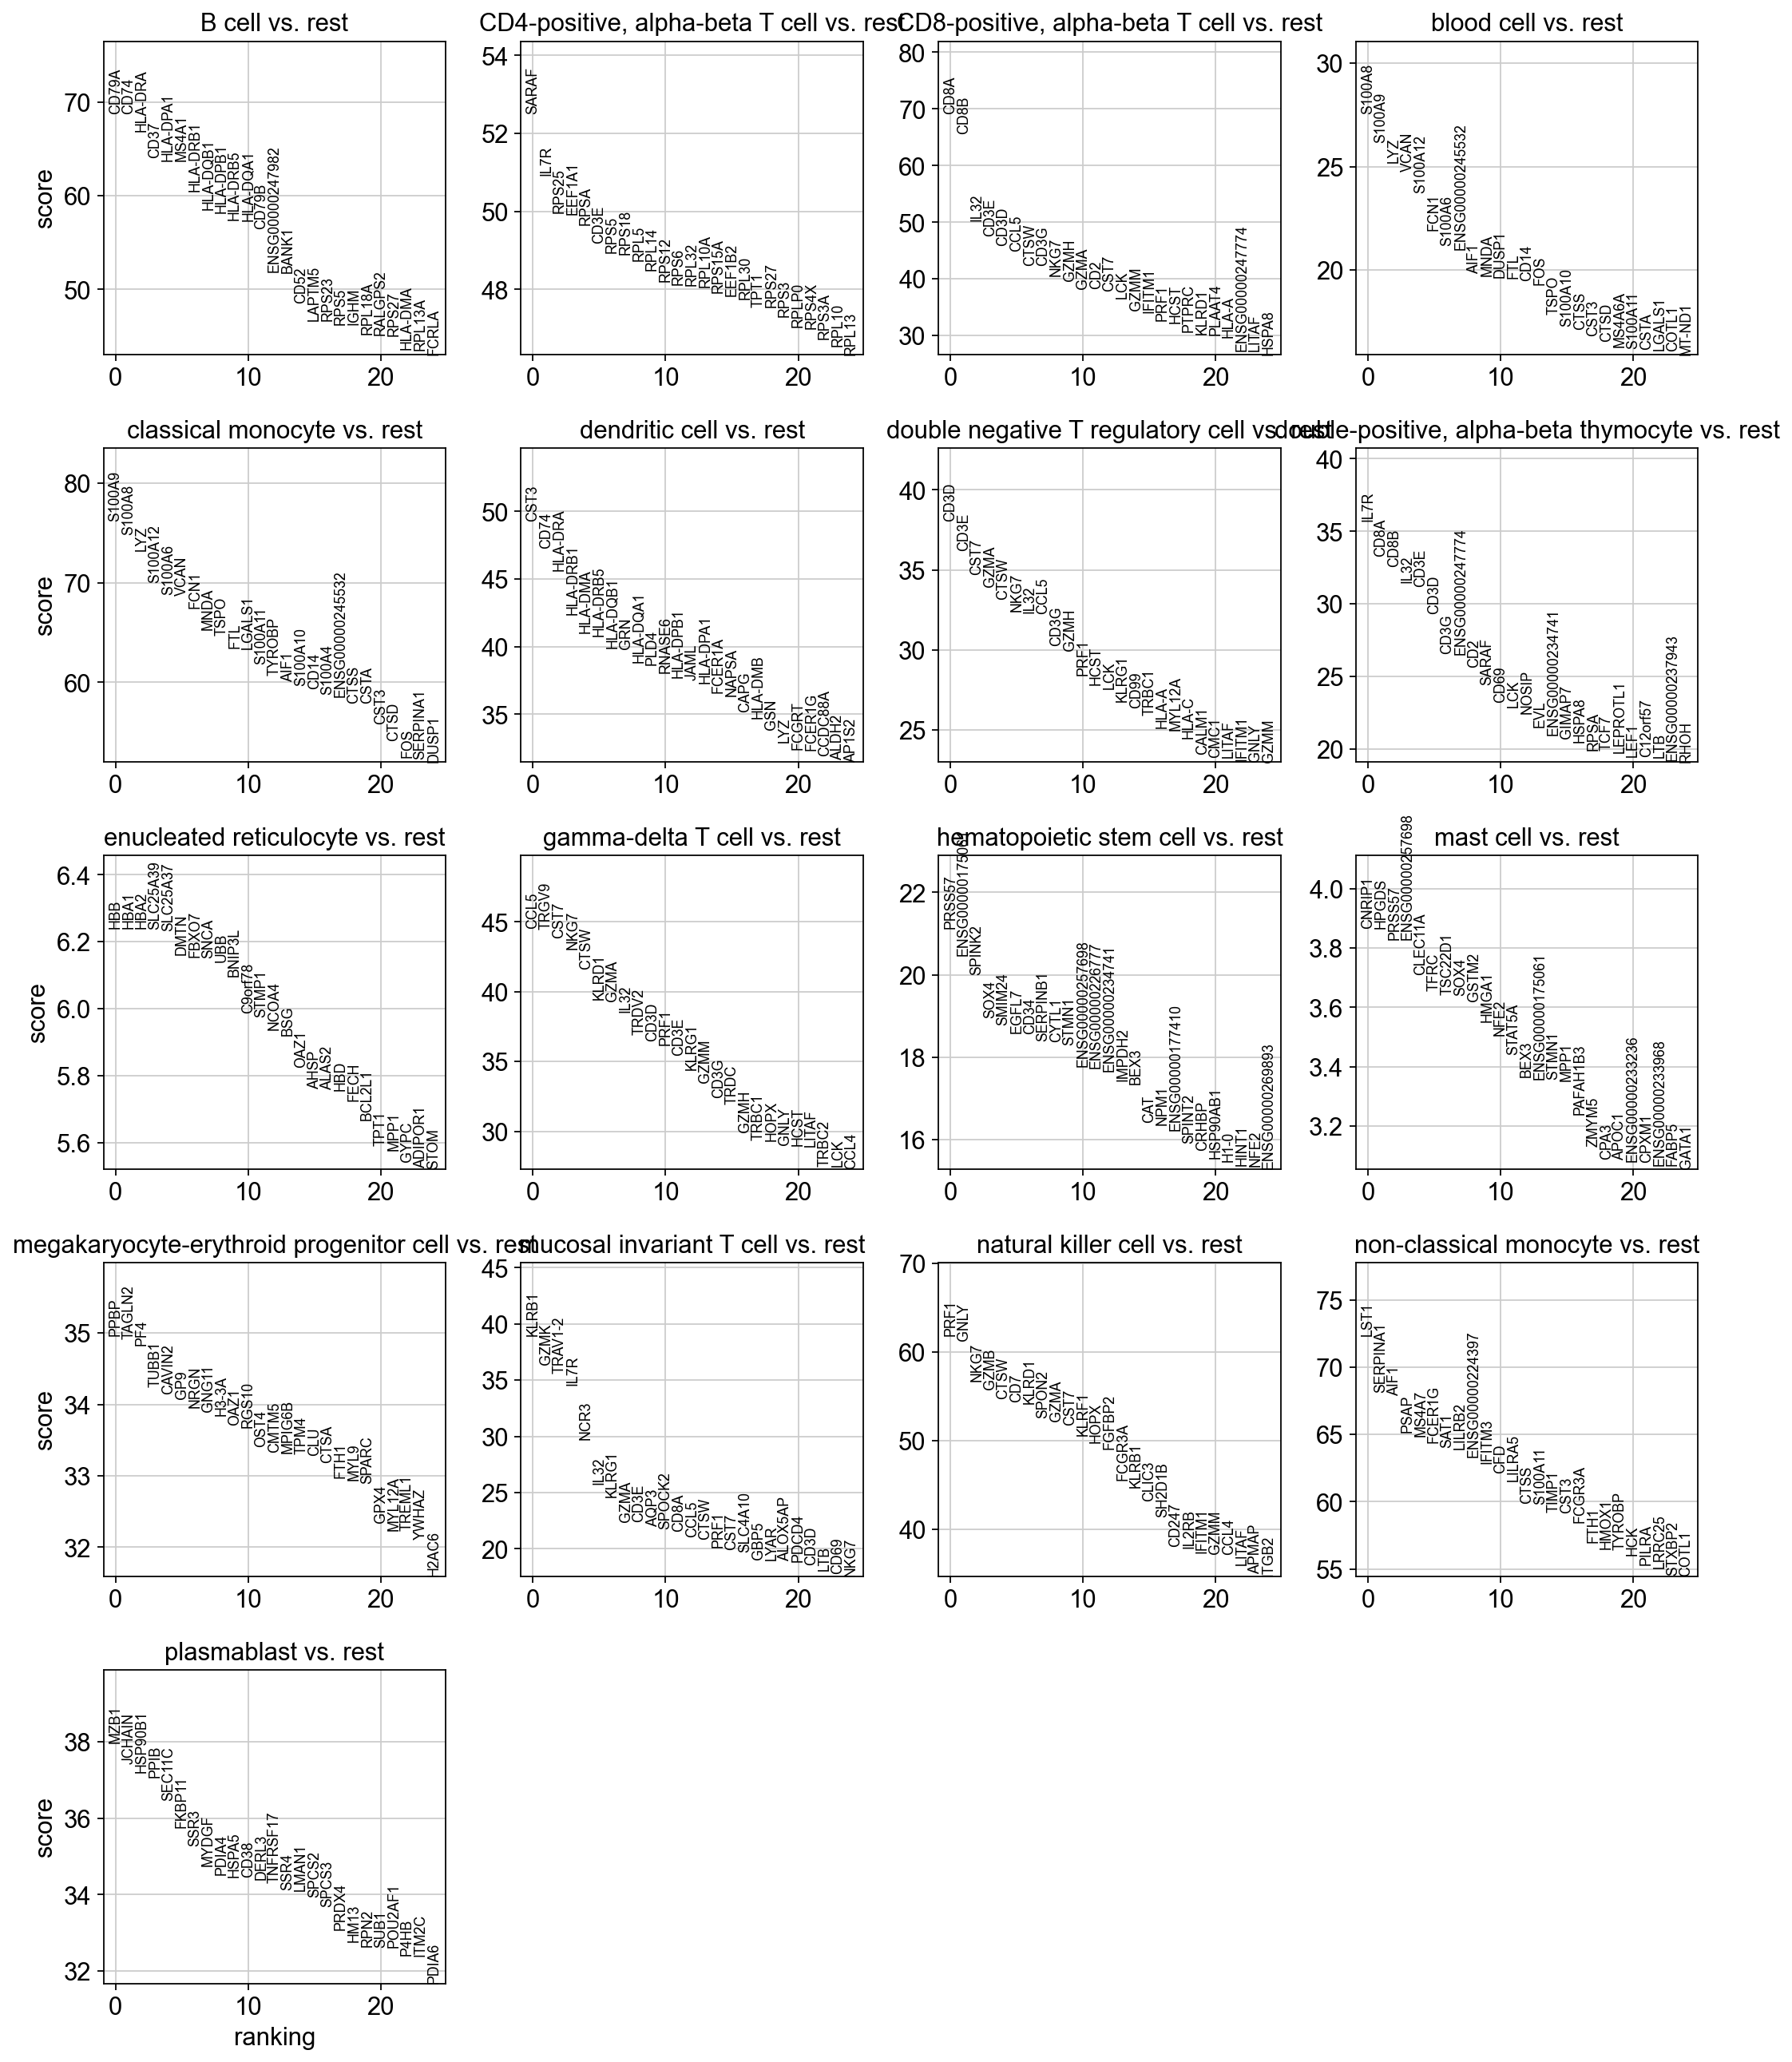

In [4]:
sc.pl.rank_genes_groups(adata, key = true_label_uns_ranked_key, n_genes = 25, sharey = False)  

In [14]:
adata.obs['cell_type_short'] = adata.obs['cell_type'].str[:8] 

In [ ]:
true_label_obs_cluster_key

scanpy==1.10.1 anndata==0.10.7 umap==0.5.6 numpy==1.26.4 scipy==1.13.1 pandas==2.2.2 scikit-learn==1.5.0 statsmodels==0.14.2 igraph==0.11.5 pynndescent==0.5.12


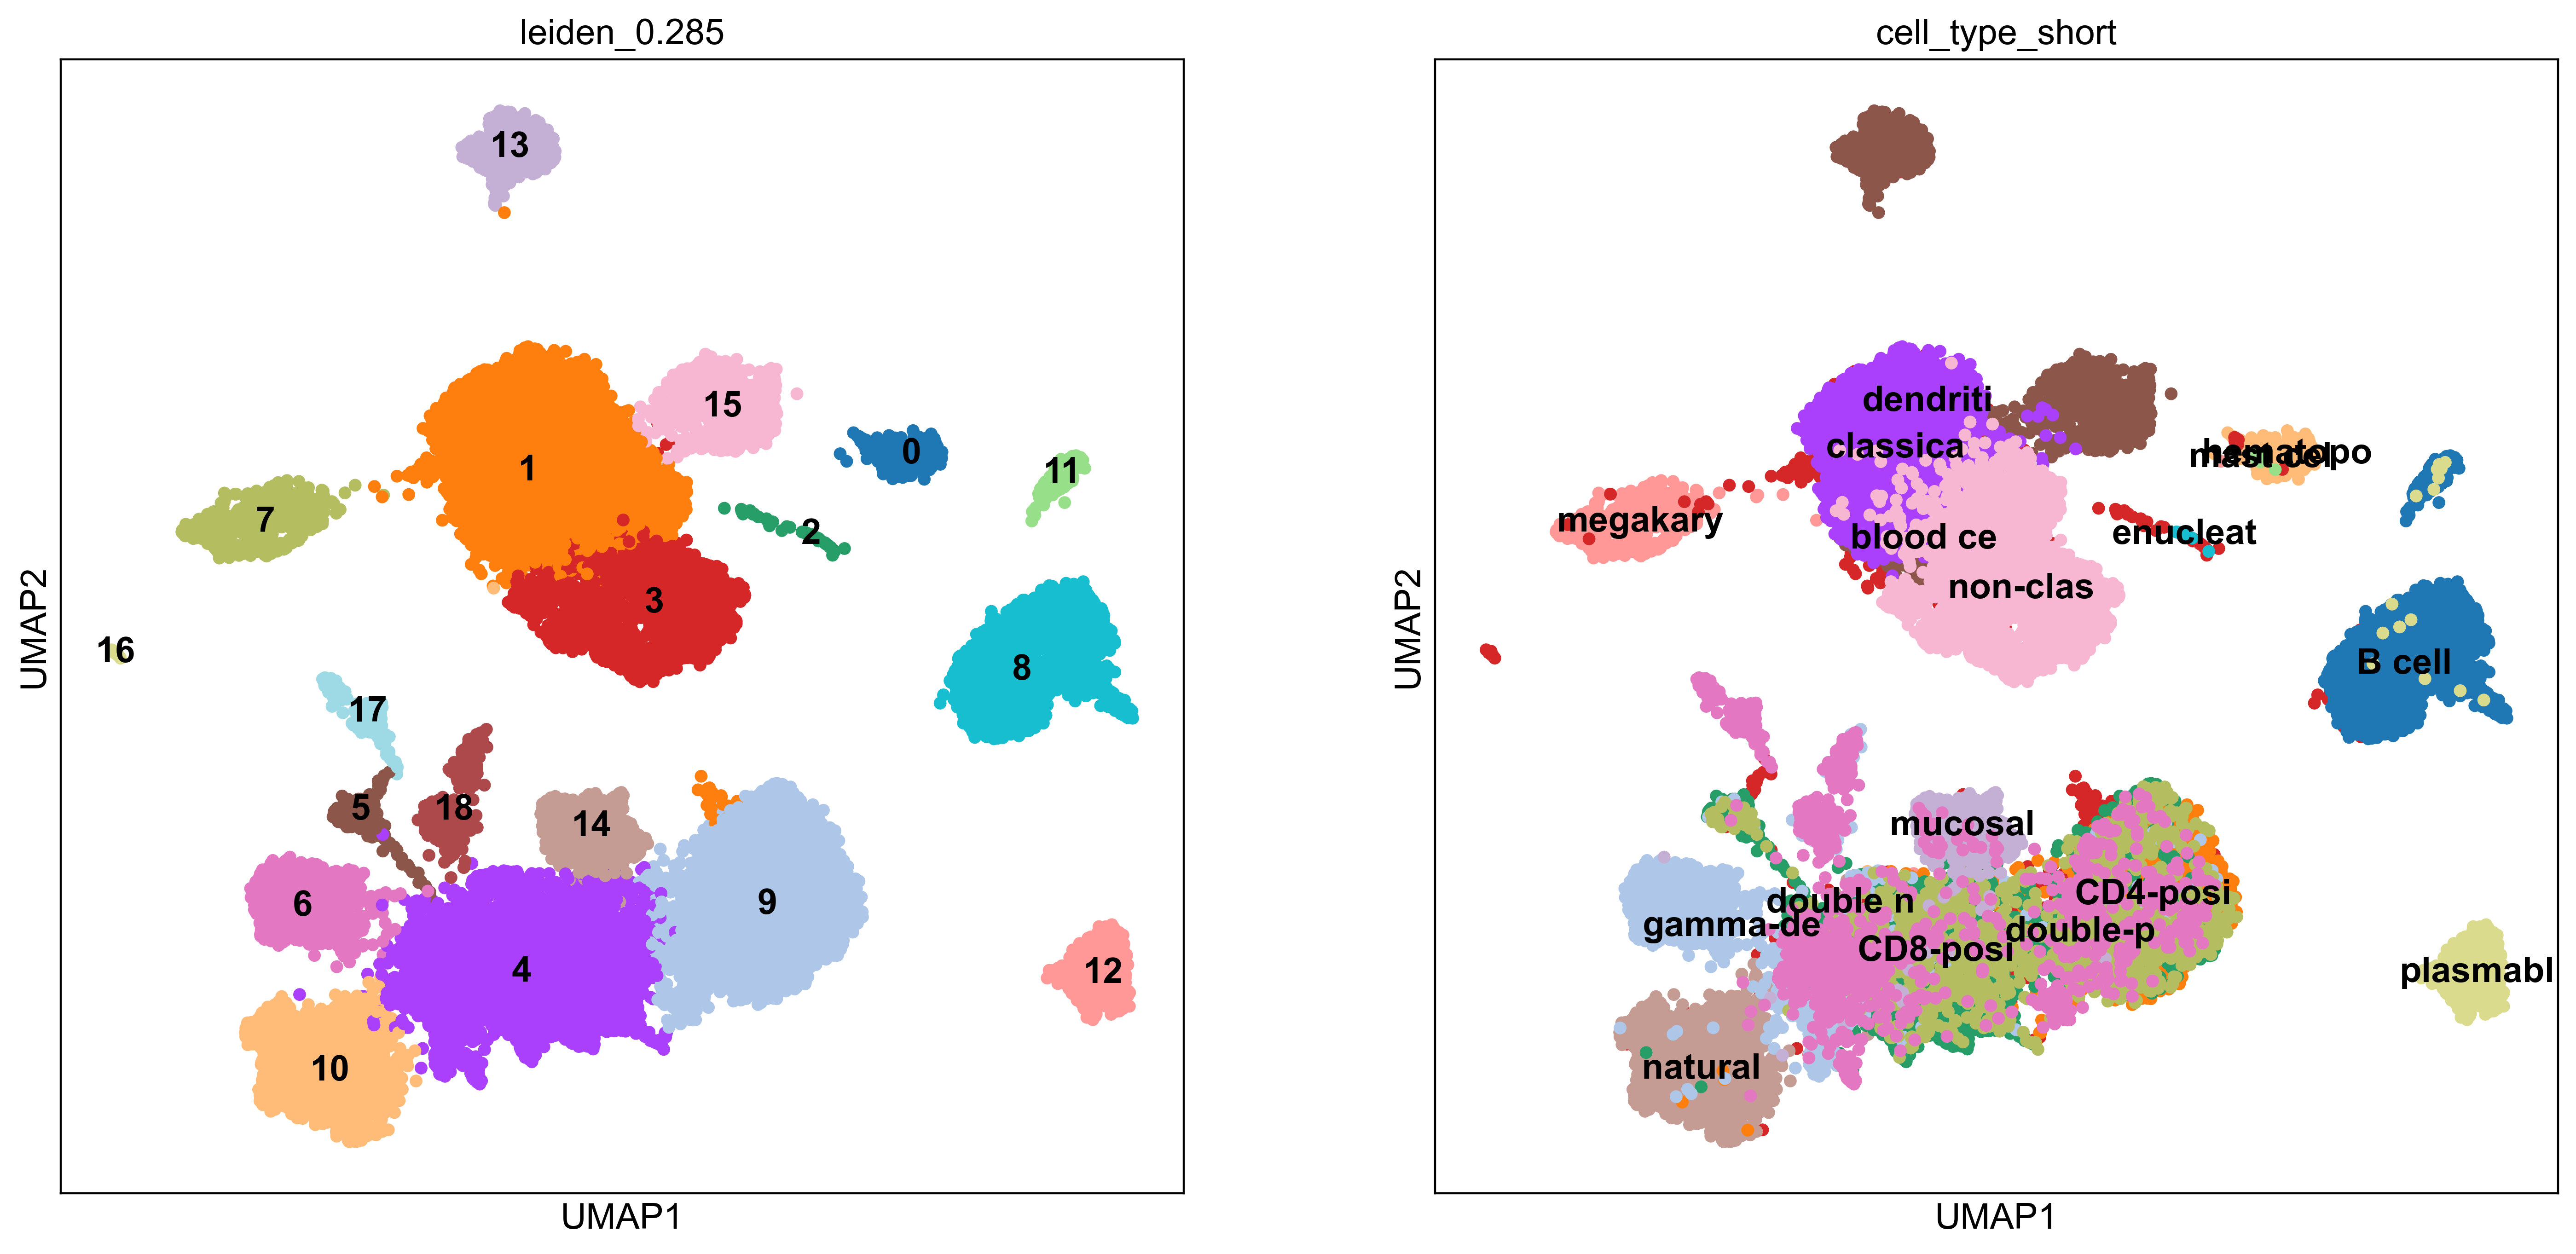

Number of CLusters inselected cluster key: leiden_0.285 is :19


In [38]:
sc.settings.verbosity = 3
sc.logging.print_header()
sc.settings.set_figure_params(dpi=200, facecolor="white", figsize=(8, 8))

sc.pl.umap(
    adata, 
    color=[selected_obs_cluster_key, "cell_type_short",], # true_label_obs_cluster_key
    legend_loc="on data", 
    title=[selected_obs_cluster_key, "cell_type_short"], # true_label_obs_cluster_key
    frameon=True, 
    size=100
)

print(f"Number of CLusters inselected cluster key: {selected_obs_cluster_key} is :{adata.obs[selected_obs_cluster_key].nunique()}")

#### `Ranked Genes (True Label)`

##### `Combination`

In [26]:
true_label_Combination_DF

,hematopoietic stem cell,megakaryocyte-erythroid progenitor cell,blood cell,mast cell,B cell,dendritic cell,natural killer cell,"CD4-positive, alpha-beta T cell","CD8-positive, alpha-beta T cell",gamma-delta T cell,"double-positive, alpha-beta thymocyte",classical monocyte,non-classical monocyte,mucosal invariant T cell,plasmablast,enucleated reticulocyte,double negative T regulatory cell
0,"[1.825, PRSS57]","[3.664, PPBP]","[2.506, S100A8]","[1.941, CNRIP1]","[2.708, CD79A]","[2.692, CST3]","[2.677, PRF1]","[2.584, SARAF]","[2.252, CD8A]","[2.794, CCL5]","[2.195, IL7R]","[3.238, S100A9]","[2.733, LST1]","[2.592, KLRB1]","[3.117, MZB1]","[4.559, HBB]","[2.23, CD3D]"
1,"[2.758, ENSG00000175061]","[3.478, TAGLN2]","[2.136, S100A9]","[1.723, HPGDS]","[3.408, CD74]","[3.057, CD74]","[2.94, GNLY]","[2.291, IL7R]","[2.07, CD8B]","[1.723, TRGV9]","[1.645, CD8A]","[3.458, S100A8]","[2.501, SERPINA1]","[2.473, GZMK]","[3.372, JCHAIN]","[3.867, HBA1]","[2.521, CD3E]"
2,"[1.742, SPINK2]","[3.292, PF4]","[2.045, LYZ]","[2.206, PRSS57]","[3.045, HLA-DRA]","[2.537, HLA-DRA]","[2.979, NKG7]","[2.952, RPS25]","[2.791, IL32]","[2.489, CST7]","[1.514, CD8B]","[3.1, LYZ]","[2.792, AIF1]","[2.008, TRAV1-2]","[3.11, HSP90B1]","[3.891, HBA2]","[2.207, CST7]"
3,"[1.734, SOX4]","[3.259, TUBB1]","[1.441, VCAN]","[2.377, ENSG00000257698]","[2.89, CD37]","[2.401, HLA-DRB1]","[2.399, GZMB]","[3.331, EEF1A1]","[2.536, CD3E]","[2.801, NKG7]","[2.759, IL32]","[2.645, S100A12]","[2.72, PSAP]","[2.724, IL7R]","[3.054, PPIB]","[3.477, SLC25A39]","[2.161, GZMA]"
4,"[1.478, SMIM24]","[3.108, CAVIN2]","[1.411, S100A12]","[1.868, CLEC11A]","[2.874, HLA-DPA1]","[1.761, HLA-DMA]","[2.661, CTSW]","[2.915, RPSA]","[2.182, CD3D]","[2.473, CTSW]","[2.542, CD3E]","[3.181, S100A6]","[1.974, MS4A7]","[1.851, NCR3]","[2.693, SEC11C]","[3.585, SLC25A37]","[2.228, CTSW]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,"[2.545, EEF2]","[2.989, CFL1]","[0.645, TNFSF13B]","[1.545, PRKDC]","[3.043, RPS3]","[0.974, PTRHD1]","[0.672, CCL3]","[2.518, FXYD5]","[0.766, GZMK]","[0.585, TGFBR3]","[2.236, TOMM7]","[1.892, PKM]","[1.669, MNDA]","[2.877, RPS18]","[1.683, SRPRA]","[1.8, H2AJ]","[0.64, PTGDR]"
96,"[1.826, PEBP1]","[3.268, FTL]","[1.218, VSIR]","[2.07, NAA38]","[2.343, HSP90AB1]","[0.673, UGCG]","[2.329, CLIC1]","[2.348, TOMM7]","[1.29, TRAF3IP3]","[0.902, CX3CR1]","[1.402, PEBP1]","[0.891, CD163]","[2.213, ENSG00000245532]","[0.943, EML4]","[2.375, MIF]","[1.441, MOSPD1]","[0.877, NUCB2]"
97,"[0.94, HEBP1]","[1.839, GUCY1B1]","[2.487, MT-ND3]","[1.128, DDX1]","[3.354, ENSG00000251562]","[0.665, CD33]","[1.426, PPP1R18]","[2.75, RPL15]","[0.524, ENSG00000235576]","[0.746, SYNE1]","[0.989, SYNE2]","[0.861, KCTD12]","[0.893, ADGRE2]","[1.054, PPP2R5C]","[1.257, SLAMF7]","[2.087, PRDX6]","[1.385, CTSC]"
98,"[1.191, TIMM13]","[2.267, KIF2A]","[2.38, PFDN5]","[1.128, PRKRA]","[3.143, RPL28]","[0.827, PRCP]","[2.276, YWHAZ]","[2.295, HINT1]","[1.896, NCL]","[2.156, EMP3]","[0.885, OPTN]","[1.06, SPI1]","[1.202, NAMPT]","[0.47, RORC]","[1.141, SYVN1]","[1.533, CISD2]","[0.67, ENSG00000281103]"


In [27]:
true_label_Combination_DF.to_excel("true_label_Combination_DF.xlsx")

##### `Main`

In [28]:
true_label_Total_DF

,Cluster,Gene,Expression,P Value,P Value(Adj),Score,Expression_Gene
0,hematopoietic stem cell,PRSS57,1.825,3.733220e-99,3.934440e-95,21.135736,"[1.825013518333435, PRSS57]"
1,hematopoietic stem cell,ENSG00000175061,2.758,3.352268e-93,1.766478e-89,20.478439,"[2.757690668106079, ENSG00000175061]"
2,hematopoietic stem cell,SPINK2,1.742,5.660589e-89,2.386278e-85,19.998631,"[1.7422393560409546, SPINK2]"
3,hematopoietic stem cell,SOX4,1.734,3.750766e-80,7.187150e-77,18.958588,"[1.7343593835830688, SOX4]"
4,hematopoietic stem cell,SMIM24,1.478,1.085542e-78,1.906754e-75,18.780741,"[1.4784719944000244, SMIM24]"
...,...,...,...,...,...,...,...
95,double negative T regulatory cell,PTGDR,0.640,2.807719e-34,3.420873e-32,12.208277,"[0.6396124958992004, PTGDR]"
96,double negative T regulatory cell,NUCB2,0.877,3.163696e-34,3.832436e-32,12.198560,"[0.8771215677261353, NUCB2]"
97,double negative T regulatory cell,CTSC,1.385,9.800195e-34,1.173685e-31,12.106137,"[1.385115146636963, CTSC]"
98,double negative T regulatory cell,ENSG00000281103,0.670,3.148613e-33,3.728453e-31,12.009995,"[0.670180082321167, ENSG00000281103]"


##### `Diversed`

In [29]:
true_label_topmarker_genes_DF

,hematopoietic stem cell,megakaryocyte-erythroid progenitor cell,blood cell,mast cell,B cell,dendritic cell,natural killer cell,"CD4-positive, alpha-beta T cell","CD8-positive, alpha-beta T cell",gamma-delta T cell,"double-positive, alpha-beta thymocyte",classical monocyte,non-classical monocyte,mucosal invariant T cell,plasmablast,enucleated reticulocyte,double negative T regulatory cell
0,PRSS57,PPBP,S100A8,CNRIP1,CD79A,CST3,PRF1,SARAF,CD8A,CCL5,IL7R,S100A9,LST1,KLRB1,MZB1,HBB,CD3D
1,ENSG00000175061,TAGLN2,S100A9,HPGDS,CD74,CD74,GNLY,IL7R,CD8B,TRGV9,CD8A,S100A8,SERPINA1,GZMK,JCHAIN,HBA1,CD3E
2,SPINK2,PF4,LYZ,PRSS57,HLA-DRA,HLA-DRA,NKG7,RPS25,IL32,CST7,CD8B,LYZ,AIF1,TRAV1-2,HSP90B1,HBA2,CST7
3,SOX4,TUBB1,VCAN,ENSG00000257698,CD37,HLA-DRB1,GZMB,EEF1A1,CD3E,NKG7,IL32,S100A12,PSAP,IL7R,PPIB,SLC25A39,GZMA
4,SMIM24,CAVIN2,S100A12,CLEC11A,HLA-DPA1,HLA-DMA,CTSW,RPSA,CD3D,CTSW,CD3E,S100A6,MS4A7,NCR3,SEC11C,SLC25A37,CTSW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,EEF2,CFL1,TNFSF13B,PRKDC,RPS3,PTRHD1,CCL3,FXYD5,GZMK,TGFBR3,TOMM7,PKM,MNDA,RPS18,SRPRA,H2AJ,PTGDR
96,PEBP1,FTL,VSIR,NAA38,HSP90AB1,UGCG,CLIC1,TOMM7,TRAF3IP3,CX3CR1,PEBP1,CD163,ENSG00000245532,EML4,MIF,MOSPD1,NUCB2
97,HEBP1,GUCY1B1,MT-ND3,DDX1,ENSG00000251562,CD33,PPP1R18,RPL15,ENSG00000235576,SYNE1,SYNE2,KCTD12,ADGRE2,PPP2R5C,SLAMF7,PRDX6,CTSC
98,TIMM13,KIF2A,PFDN5,PRKRA,RPL28,PRCP,YWHAZ,HINT1,NCL,EMP3,OPTN,SPI1,NAMPT,RORC,SYVN1,CISD2,ENSG00000281103


In [30]:
true_label_topmarker_genes_DF.to_excel("true_label_topmarker_genes_DF.xlsx")

#### `Ranked Genes (selected)`

##### `Combination`

In [31]:
selected_Combination_DF

,0,1,4,7,8,9,10,3,11,5,12,13,2,14,15,16,17,6,18
0,"[1.8322298526763916, nan]","[3.380068063735962, nan]","[2.8504397869110107, nan]","[3.6725873947143555, nan]","[2.7181875705718994, nan]","[2.3152713775634766, nan]","[2.686734914779663, nan]","[2.728590726852417, nan]","[3.2289552688598633, nan]","[2.496431350708008, nan]","[3.1770823001861572, nan]","[2.493009567260742, nan]","[3.3684234619140625, nan]","[2.5589382648468018, nan]","[2.5732407569885254, nan]","[3.312081813812256, nan]","[2.504755973815918, nan]","[2.657165050506592, nan]","[2.358344316482544, nan]"
1,"[2.7914390563964844, nan]","[3.104548215866089, nan]","[2.8240742683410645, nan]","[3.296567916870117, nan]","[2.5863699913024902, nan]","[2.5630035400390625, nan]","[2.9586315155029297, nan]","[2.1396515369415283, nan]","[3.166100025177002, nan]","[2.1834380626678467, nan]","[3.438861131668091, nan]","[2.338358163833618, nan]","[4.004713535308838, nan]","[2.5019891262054443, nan]","[2.9331979751586914, nan]","[3.0017638206481934, nan]","[2.320725917816162, nan]","[2.440751314163208, nan]","[2.338583469390869, nan]"
2,"[1.729217290878296, nan]","[3.019731283187866, nan]","[2.09102463722229, nan]","[3.4673917293548584, nan]","[3.399057388305664, nan]","[2.9171886444091797, nan]","[2.986968517303467, nan]","[2.526526927947998, nan]","[2.9377808570861816, nan]","[2.5960853099823, nan]","[3.1523659229278564, nan]","[2.1563751697540283, nan]","[3.3223273754119873, nan]","[2.7716333866119385, nan]","[2.6292903423309326, nan]","[3.4104297161102295, nan]","[2.249952554702759, nan]","[2.886131525039673, nan]","[2.1158761978149414, nan]"
3,"[1.770381212234497, nan]","[3.1694934368133545, nan]","[2.4541430473327637, nan]","[3.2813334465026855, nan]","[3.037895917892456, nan]","[1.93478524684906, nan]","[2.4272780418395996, nan]","[2.084977626800537, nan]","[3.4364025592803955, nan]","[2.3233041763305664, nan]","[3.073489189147949, nan]","[2.3741369247436523, nan]","[2.9394304752349854, nan]","[1.9393025636672974, nan]","[2.8296732902526855, nan]","[3.423806667327881, nan]","[2.4315555095672607, nan]","[2.5212478637695312, nan]","[2.255034923553467, nan]"
4,"[1.474474310874939, nan]","[2.5641355514526367, nan]","[2.395968437194824, nan]","[3.124763011932373, nan]","[2.8946533203125, nan]","[2.571415662765503, nan]","[2.3922038078308105, nan]","[2.0512781143188477, nan]","[3.075986862182617, nan]","[2.1940221786499023, nan]","[2.7363901138305664, nan]","[2.423726797103882, nan]","[2.942863702774048, nan]","[1.863314151763916, nan]","[2.094515323638916, nan]","[2.937166690826416, nan]","[2.2879767417907715, nan]","[1.7973936796188354, nan]","[2.6051225662231445, nan]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,"[0.9327560067176819, nan]","[0.8633051514625549, nan]","[1.3182663917541504, nan]","[2.5991878509521484, nan]","[2.340787887573242, nan]","[3.008397102355957, nan]","[1.4565409421920776, nan]","[1.964495301246643, nan]","[1.9780720472335815, nan]","[1.2446002960205078, nan]","[2.081005096435547, nan]","[1.478775978088379, nan]","[3.0360050201416016, nan]","[1.3304394483566284, nan]","[1.2081416845321655, nan]","[2.300192356109619, nan]","[1.596205472946167, nan]","[1.691125750541687, nan]","[0.8917825818061829, nan]"
96,"[2.702068567276001, nan]","[0.857012152671814, nan]","[0.8296956419944763, nan]","[2.301776170730591, nan]","[2.967895746231079, nan]","[2.6800904273986816, nan]","[2.6072278022766113, nan]","[1.235139012336731, nan]","[1.8942627906799316, nan]","[3.0190346240997314, nan]","[1.5178312063217163, nan]","[0.8528545498847961, nan]","[2.980332851409912, nan]","[2.5569727420806885, nan]","[2.8044168949127197, nan]","[1.9853559732437134, nan]","[2.661252021789551, nan]","[2.6723837852478027, nan]","[1.2514076232910156, nan]"
97,"[1.1175824403762817, nan]","[2.547532081604004, nan]","[0.6144309043884277, nan]","[3.002591371536255, nan]","[1.3729116916656494, nan]","[1.6685787439346313, nan]","[0.6891620755195618, nan]","

##### `Main`

In [32]:
selected_Total_DF

,Cluster,Gene,Expression,P Value,P Value(Adj),Score,Expression_Gene
0,0,NaN,1.832230,2.107704e-105,2.221309e-101,21.804396,"[1.8322298526763916, PRSS57]"
1,0,NaN,2.791439,2.960369e-101,1.559967e-97,21.362873,"[2.7914390563964844, ENSG00000175061]"
2,0,NaN,1.729217,4.597627e-92,1.615146e-88,20.350479,"[1.729217290878296, SPINK2]"
3,0,NaN,1.770381,1.215943e-87,2.847739e-84,19.845055,"[1.770381212234497, SOX4]"
4,0,NaN,1.474474,8.284291e-83,1.455136e-79,19.277594,"[1.474474310874939, SMIM24]"
...,...,...,...,...,...,...,...
95,18,NaN,0.891783,1.400545e-19,2.270822e-17,9.052248,"[0.8917825818061829, CD300A]"
96,18,NaN,1.251408,3.312097e-19,5.329190e-17,8.957804,"[1.2514076232910156, FCGR3A]"
97,18,NaN,2.203547,4.995329e-19,7.799374e-17,8.912370,"[2.2035467624664307, ITGB2]"
98,18,NaN,1.509004,5.640882e-19,8.742538e-17,8.898889,"[1.5090038776397705, IL7R]"


##### `Diversed`

In [33]:
selected_topmarker_genes_DF

,0,1,4,7,8,9,10,3,11,5,12,13,2,14,15,16,17,6,18
0,PRSS57,S100A8,CCL5,PPBP,CD79A,IL7R,PRF1,LST1,IGHV3-48,TRAV3,MZB1,PLD4,HBA2,KLRB1,HLA-DQA1,IGHV4-39,TRBV7-9,TRDV2,TRGV5
1,ENSG00000175061,S100A9,NKG7,PF4,MS4A1,SARAF,GNLY,MS4A7,ENSG00000255823,TRBV15,JCHAIN,LILRA4,HBB,GZMK,HLA-DRB1,IGHV3-33,TRAV12-3,TRGV9,TRAV38-2DV8
2,SPINK2,LYZ,GZMH,TAGLN2,CD74,RPSA,NKG7,SERPINA1,IGKV4-1,GZMH,HSP90B1,SERPINF1,HBA1,IL7R,HLA-DQB1,IGKV3-11,TRGV8,CCL5,TRBC1
3,SOX4,S100A6,CST7,TUBB1,HLA-DRA,NOSIP,GZMB,ENSG00000224397,CD74,CD8A,PPIB,IRF8,SLC25A37,TRAV1-2,HLA-DPB1,IGKV3-20,GZMH,CST7,KLRD1
4,SMIM24,FCN1,GZMA,CAVIN2,CD37,CD3E,CD7,LILRB2,HLA-DRA,CD8B,SEC11C,IRF7,SLC25A39,NCR3,FCER1A,JCHAIN,KLRD1,KLRG1,GZMA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,PCBD1,LRP1,RNF213,FCER1G,HSP90AB1,RPS7,PPP1R18,PTPN6,SEC62,CDK2AP2,IGKC,PHB1,RPL18A,DDIT4,PTPRE,SNRPD2,PPP1CA,RPS4Y1,CD300A
96,EEF1B2,RNASE2,ITM2A,DYNLL1,RPLP2,EEF1D,MYL12A,THEMIS2,SYNGR2,RPS3,DNAJC3,TNFRSF21,RPL8,MT-ND4L,VIM,UQCRH,CFL1,RPL3,FCGR3A
97,CLU,MT-ND4,S1PR5,CFL1,IGKC,CD3G,CD38,ATG3,VPREB3,CYBA,RPL22L1,JAML,OPTN,CD40LG,FES,FTH1,MT2A,NOSIP,ITGB2
98,HEBP1,FGR,GIMAP4,MYH9,RPS29,RPL31,CYRIB,C20orf27,RPL12,TIGIT,SSR2,SCAMP5,RPL32,GPR171,KLF10,RETN,RASSF1,RPS26,IL7R
